# Cryptocurrency Project

### Exploratory Data Analysis 

In [ ]:
# Import libraries
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
from matplotlib.ticker import ScalarFormatter 
import warnings 
warnings.filterwarnings("ignore")

#for bold
start = '\033[1m' 
end = '\033[0;0m'


**Merging all the data csv of crytocurrencies**

In [ ]:
df = pd.DataFrame()
for file in os.listdir("Data"):
    if file.endswith(".csv"):
        df = pd.concat([df , pd.read_csv(os.path.join("Data", file),infer_datetime_format=True)], axis=0 )

df.reset_index(drop=True, inplace=True)
df.drop('SNo',axis=1 ,inplace=True)
df

Name Symbol  ...     Marketcap  Unnamed: 0
0          Aave   AAVE  ...  8.912813e+07         NaN
1          Aave   AAVE  ...  7.101144e+07         NaN
2          Aave   AAVE  ...  6.713004e+07         NaN
3          Aave   AAVE  ...  2.202651e+08         NaN
4          Aave   AAVE  ...  2.356322e+08         NaN
...         ...    ...  ...           ...         ...
74159  Litecoin    LTC  ...  9.141322e+09         NaN
74160  Litecoin    LTC  ...  9.364008e+09         NaN
74161  Litecoin    LTC  ...  9.672815e+09         NaN
74162  Litecoin    LTC  ...  9.216723e+09         NaN
74163  Litecoin    LTC  ...  9.277627e+09         NaN

[74164 rows x 10 columns]

In [ ]:
df

Name Symbol  ...     Marketcap  Unnamed: 0
0          Aave   AAVE  ...  8.912813e+07         NaN
1          Aave   AAVE  ...  7.101144e+07         NaN
2          Aave   AAVE  ...  6.713004e+07         NaN
3          Aave   AAVE  ...  2.202651e+08         NaN
4          Aave   AAVE  ...  2.356322e+08         NaN
...         ...    ...  ...           ...         ...
74159  Litecoin    LTC  ...  9.141322e+09         NaN
74160  Litecoin    LTC  ...  9.364008e+09         NaN
74161  Litecoin    LTC  ...  9.672815e+09         NaN
74162  Litecoin    LTC  ...  9.216723e+09         NaN
74163  Litecoin    LTC  ...  9.277627e+09         NaN

[74164 rows x 10 columns]

In [ ]:
# Convert date to datetime
df["Date"] = pd.to_datetime(df['Date']).dt.date
df

Name Symbol        Date  ...        Volume     Marketcap  Unnamed: 0
0          Aave   AAVE  2020-10-05  ...  0.000000e+00  8.912813e+07         NaN
1          Aave   AAVE  2020-10-06  ...  5.830915e+05  7.101144e+07         NaN
2          Aave   AAVE  2020-10-07  ...  6.828342e+05  6.713004e+07         NaN
3          Aave   AAVE  2020-10-08  ...  1.658817e+06  2.202651e+08         NaN
4          Aave   AAVE  2020-10-09  ...  8.155377e+05  2.356322e+08         NaN
...         ...    ...         ...  ...           ...           ...         ...
74159  Litecoin    LTC  2021-07-02  ...  1.418981e+09  9.141322e+09         NaN
74160  Litecoin    LTC  2021-07-03  ...  1.236494e+09  9.364008e+09         NaN
74161  Litecoin    LTC  2021-07-04  ...  1.431657e+09  9.672815e+09         NaN
74162  Litecoin    LTC  2021-07-05  ...  1.338246e+09  9.216723e+09         NaN
74163  Litecoin    LTC  2021-07-06  ...  1.504907e+09  9.277627e+09         NaN

[74164 rows x 10 columns]

In [ ]:
# Create a file .csv
df.to_csv('final.csv')
df

Name Symbol        Date  ...        Volume     Marketcap  Unnamed: 0
0          Aave   AAVE  2020-10-05  ...  0.000000e+00  8.912813e+07         NaN
1          Aave   AAVE  2020-10-06  ...  5.830915e+05  7.101144e+07         NaN
2          Aave   AAVE  2020-10-07  ...  6.828342e+05  6.713004e+07         NaN
3          Aave   AAVE  2020-10-08  ...  1.658817e+06  2.202651e+08         NaN
4          Aave   AAVE  2020-10-09  ...  8.155377e+05  2.356322e+08         NaN
...         ...    ...         ...  ...           ...           ...         ...
74159  Litecoin    LTC  2021-07-02  ...  1.418981e+09  9.141322e+09         NaN
74160  Litecoin    LTC  2021-07-03  ...  1.236494e+09  9.364008e+09         NaN
74161  Litecoin    LTC  2021-07-04  ...  1.431657e+09  9.672815e+09         NaN
74162  Litecoin    LTC  2021-07-05  ...  1.338246e+09  9.216723e+09         NaN
74163  Litecoin    LTC  2021-07-06  ...  1.504907e+09  9.277627e+09         NaN

[74164 rows x 10 columns]

**Finding the top 5 crytpocurrencies by market**

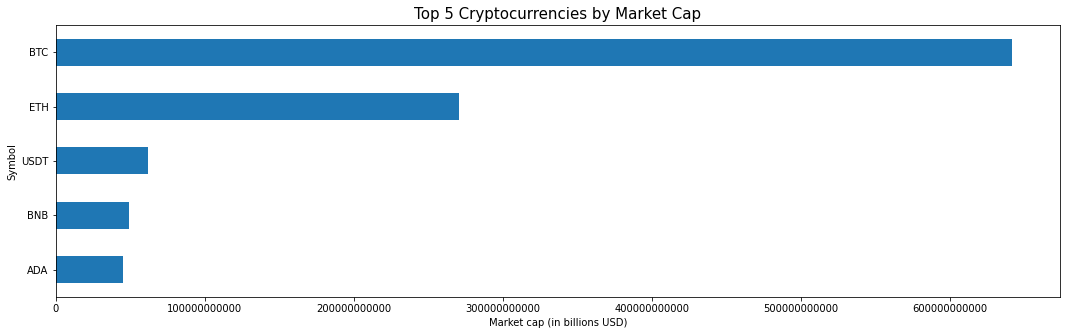

In [ ]:
plt.figure(figsize = (18,5))
ax = df.groupby(["Symbol"])["Marketcap"].last().sort_values(ascending = False).head(5).sort_values().plot(kind = 'barh')
ax.set_xlabel("Market cap (in billions USD)")
ax.ticklabel_format(style="plain", axis="x")
plt.title("Top 5 Cryptocurrencies by Market Cap", fontsize=15)
plt.show()


**Observation:**

Bitcoin is the coin that has the biggest market cap and ADA in the top 5 is the last one with at least 1/13 part of Bitcoin. Ethereum has less than 50% what currently has Bitcoin.


**Plotting Graphs of Closing Prices of Top 4 Cryptocurrencies as per Market Cap**

In [ ]:
dx = df.copy()

top4 = dx.groupby(["Symbol"])["Marketcap"].last().sort_values(ascending=False).head(4).index
top4_except_btc = dx[dx["Symbol"] != "BTC"].groupby(["Symbol"])["Marketcap"].last().sort_values(ascending=False).head(4).index
top4_except_btc_eth = dx[(dx["Symbol"] != "BTC")&(dx["Symbol"] != "ETH")].groupby(["Symbol"])["Marketcap"].last().sort_values(ascending=False).head(4).index
top4_except_btc_eth_usdt = dx[(dx["Symbol"] != "BTC")&(dx["Symbol"] != "ETH")&(dx["Symbol"] != "USDT")].groupby(["Symbol"])["Marketcap"].last().sort_values(ascending=False).head(4).index

data_top4 = dx[dx["Symbol"].isin(top4)]
data_top4_except_btc = dx[dx["Symbol"].isin(top4_except_btc)]
data_top4_except_btc_eth = dx[dx["Symbol"].isin(top4_except_btc_eth)]
data_top4_except_btc_eth_usdt = dx[dx["Symbol"].isin(top4_except_btc_eth_usdt)]


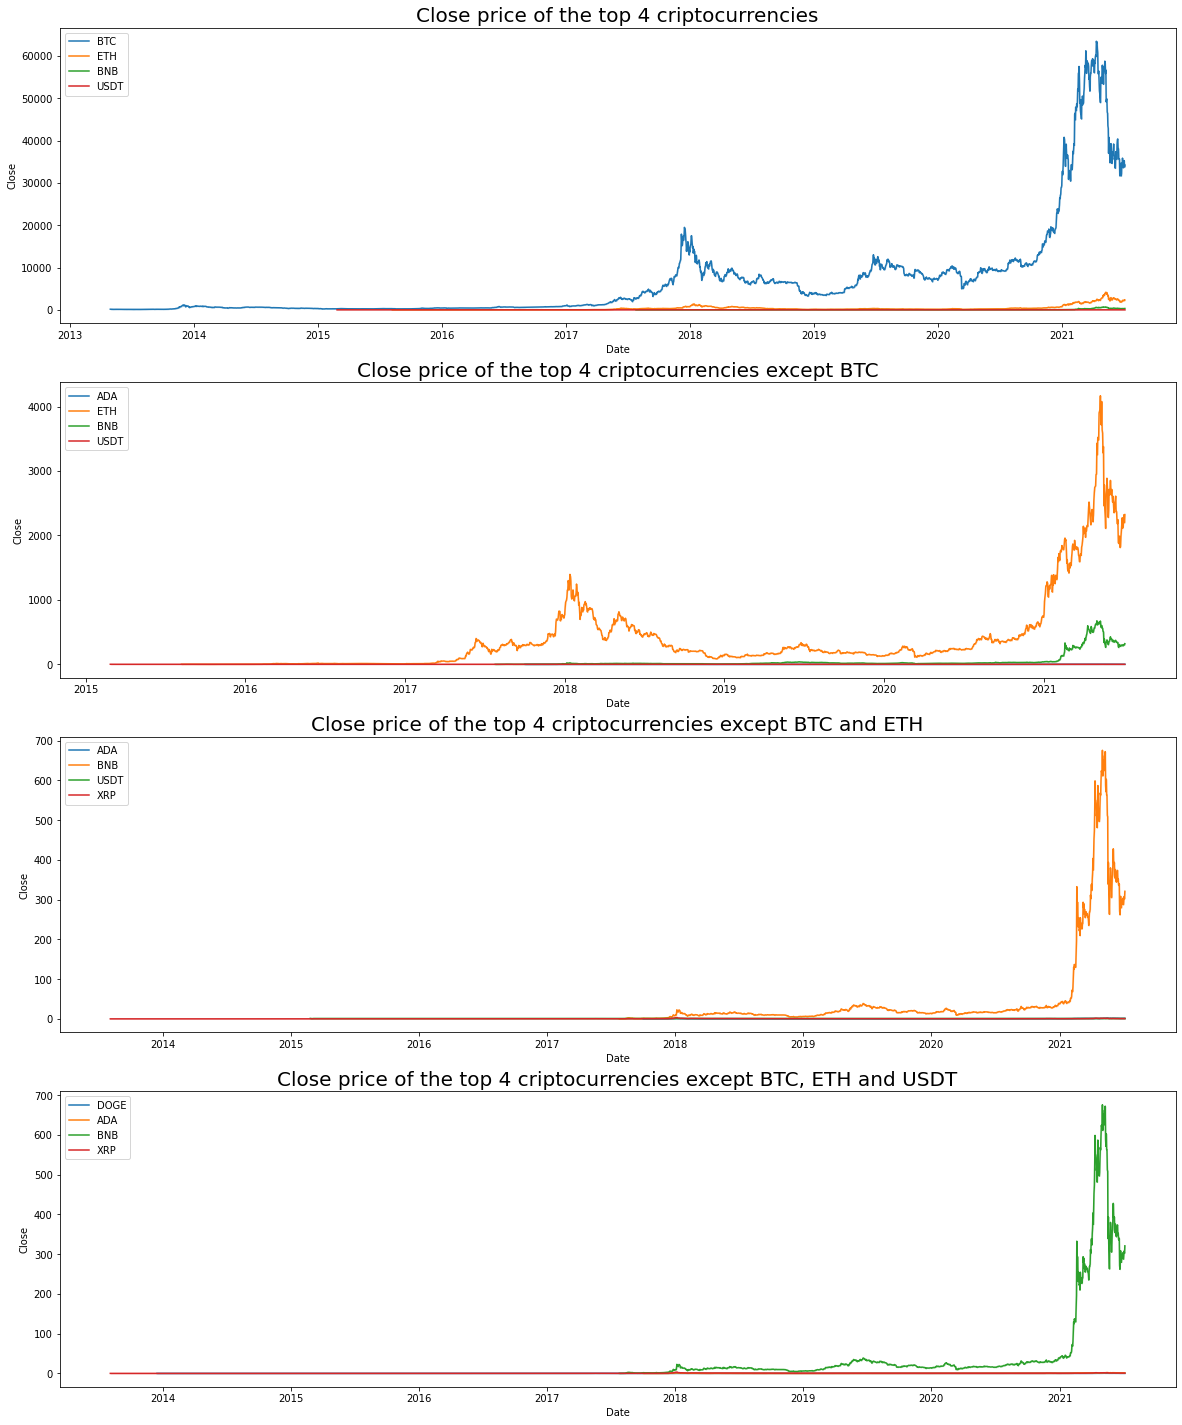

In [ ]:
plt.figure(figsize = (20,25))

plt.subplot(4,1,1)
sns.lineplot(data = data_top4, x="Date", y="Close", hue="Symbol")
plt.title("Close price of the top 4 criptocurrencies", fontsize = 20)
plt.legend(loc = "upper left")

plt.subplot(4,1,2)
sns.lineplot(data = data_top4_except_btc, x="Date", y="Close", hue="Symbol")
plt.title("Close price of the top 4 criptocurrencies except BTC", fontsize = 20)
plt.legend(loc = "upper left")

plt.subplot(4,1,3)
sns.lineplot(data = data_top4_except_btc_eth, x="Date", y="Close", hue="Symbol")
plt.title("Close price of the top 4 criptocurrencies except BTC and ETH", fontsize = 20)
plt.legend(loc = "upper left")

plt.subplot(4,1,4)
sns.lineplot(data = data_top4_except_btc_eth_usdt, x="Date", y="Close", hue="Symbol")
plt.title("Close price of the top 4 criptocurrencies except BTC, ETH and USDT", fontsize = 20)
plt.legend(loc = "upper left")

**Observation:**

In 2021 Bitcoin reached its maximum historical price. In general all the cryptocurrencies had a rise of price.

In [ ]:
for i in ['BTC','ETH','USDT','BNB','ADA']:
    options=[i]
    rslt_df = df[df['Symbol'].isin(options)] 
    layout = dict(
            title=f"{i} Candlestick Chart",
            xaxis=go.layout.XAxis(title=go.layout.xaxis.Title( text="Time")),
            yaxis=go.layout.YAxis(title=go.layout.yaxis.Title( text="Price US Dollars"))
    )
    data=[go.Candlestick(x=rslt_df['Date'],
                    open=rslt_df['Open'],
                    high=rslt_df['High'],
                    low=rslt_df['Low'],
                    close=rslt_df['Close'])]
    figSignal = go.Figure(data=data,layout=layout)

    figSignal.show()

    

**Observation:**

Investing in more stable currencies like Bitcoin is less risky than investing in penny currencies like USDT.

However, to obtain possible short-term profits or to carry out trading, if everything goes as expected, it can be a margin of greater or considerable profits.

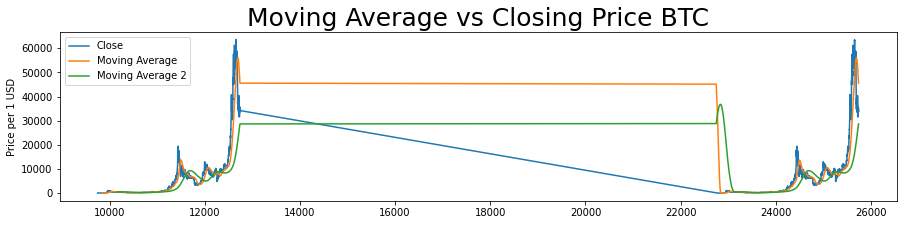

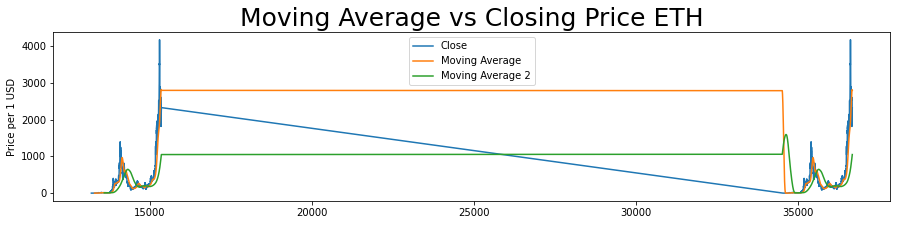

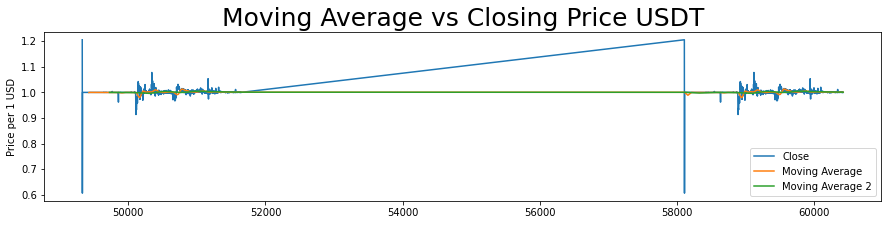

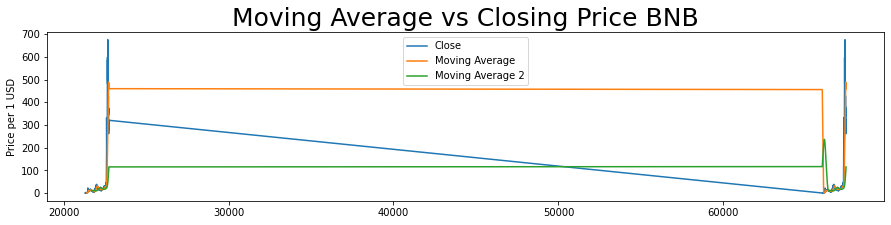

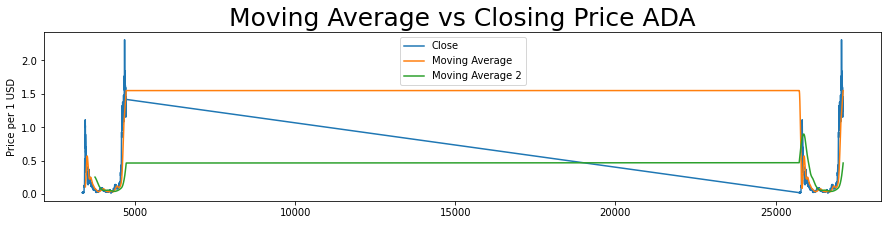

In [ ]:
for i in ['BTC','ETH','USDT','BNB','ADA']:
    j=1
    dft=df[df['Symbol']==i]
    top_currency_name = dft.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).index
    top_currency = dft[dft['Symbol'].isin(top_currency_name)]
    top_currency['Moving Average']=top_currency['Close'].rolling(window=50).mean()
    top_currency['Moving Average 2']=top_currency['Close'].rolling(window=200).mean()
    plt.subplot(5,1,j)
    top_currency['Close'].plot(figsize=(15,18))
    ax=top_currency['Moving Average'].rolling(window=50).mean().plot()
    ax=top_currency['Moving Average 2'].rolling(window=200).mean().plot()
    ax.set_ylabel("Price per 1 USD");
    plt.title(f"Moving Average vs Closing Price {i}", fontsize=25);
    plt.legend()
    j=j+1
    plt.show()

**Observation:**

The smaller the gap between the averages, it means that the currency is less volatile. Normally when the currencies are very volatile as in the case of USDT it is recommended not to invest in these currencies.

In [ ]:
import plotly.express as px

In [ ]:
area = px.area(data_frame= df , x = "Date" ,y= "High", line_group="Name" , color = "Name" , color_discrete_sequence=px.colors.qualitative.Alphabet_r,title = 'Area Plot for TOP Cryptocurrencies')

area.update_xaxes(
    title_text = 'Date',rangeslider_visible = True,rangeselector = dict(buttons = list([dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))

area.update_yaxes(title_text = 'Price in USD', ticksuffix = '$')
area.update_layout(showlegend = True,title = {'text': 'Area Plot for TOP Cryptocurrencies','y':0.9,'x':0.5,'xanchor': 'center',
                                              'yanchor': 'top'})

area.show()

In [ ]:
area = px.area(data_frame = df, y = "Marketcap", x = "Date", line_group = "Name", color = "Name", color_discrete_sequence=px.colors.qualitative.Alphabet, title="Market cap change of all cryptocurrencies")

area.update_xaxes(title_text = "Date", rangeslider_visible = True, rangeselector = dict(buttons = list([
            dict(count = 1, label = "1M", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6M", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1Y", step = "year", stepmode = "backward"),
            dict(step = "all")])))

area.update_yaxes(title_text = "Percentage change", ticksuffix = "%")
area.update_layout(showlegend = True, title ={"text":"Market cap change of all cryptocurrencies", "y":0.9, "x":0.5, "xanchor": "center", "yanchor":"top"})

area.show()


**Conclusions**

Bitcoin is the currency with the highest market cap, followed by Ethereum and then USDT.

There are cryptocurrencies that have greater volatility than others, so to make long-term investments it is not advisable to buy coins that have high volatility.

In 2021, Bitcoin reaches its maximum historical price recorded up to this moment, in addition to other currencies that follow it at the top of the market cap.

The most tempting and best performing currencies for investments are Bitcoin and Ethereum.

Coins usually present a bullish pattern when two golden crosses and two death crosses are presented.

When currencies are very volatile there are many golden crosses and many death crosses.